Usted está buscando optimizar el retorno de 7 proyectos que están activos dentro de la organización donde trabaja. La única forma de optimizarlos es mediante el costo de operación del proyecto, dado que no tiene control sobre las demás palancas: 

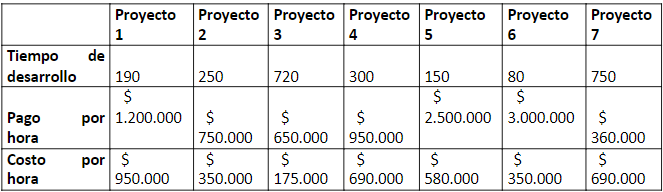

Tenga en cuenta que la alta gerencia le ha puesto un límite de costo total de $1.000.000.000, en caso tal que se supere este límite, el costo del proyecto se duplica. 

Diseñe un algoritmo evolutivo que le permita determinar el mejor valor para el costo. Tenga en cuenta que el retorno está dado por un ingreso general del proyecto (horas de desarrollo y pago por hora) y un costo general del proyecto (horas de desarrollo – costo por hora) 

 

Determine los mecanismos de generación, selección, cruce, mutación, tamaño de población y cantidad de generaciones que perciba acordes al problema. 

In [26]:
#IMPORTAR LIBRERÍAS
import random
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

import warnings
warnings.filterwarnings('ignore')

In [27]:
#Definir pesos, beneficios y capacidad
tiempo = [190, 250, 720, 300, 150, 80, 750]
pago = [1200000, 750000, 650000, 950000, 2500000, 3000000, 360000]
costo = [950000, 350000, 175000, 690000, 580000, 350000, 690000]
limite = 1000000000

In [28]:
#Parámetros del algoritmo
tamañoPoblacion = 100
probabilidadMutacion = 0.1
cantidadGeneraciones = 50

In [29]:
#Función de evaluación de aptitud
def evaluarAptitud(individuo):
    costoTotal = sum([costo[i] * (2 if individuo[i] else 1) for i in range(len(individuo))])
    ingresoTotal = sum([tiempo[i] * pago[i] for i in range (len(individuo))])
    return ingresoTotal - costoTotal

In [30]:
#Generación de la población inicial
poblacion = []
for _ in range (tamañoPoblacion):
    individuo = [random.choice([True, False]) for _ in range(len(tiempo))]
    poblacion.append(individuo)

In [31]:
#Ciclo evolutivo
for generacion in range (cantidadGeneraciones):
    #Evaluación de aptitud de la población
    aptitudes = [evaluarAptitud(individuo) for individuo in poblacion]
    
    #Selección de padres
    padres = random.choices(poblacion, weights = aptitudes, k = tamañoPoblacion)
    
    #Creación de hijos mediante cruce
    hijos = []
    for padre1, padre2 in zip(padres[::2], padres[1::2]):
        puntoCorte = random.randint(1, len(tiempo) - 1)
        hijo1 = padre1[:puntoCorte] + padre2[puntoCorte:]
        hijo2 = padre2[:puntoCorte] + padre1[puntoCorte:]
        hijos.extend([hijo1, hijo2])
    
    #Mutación
    for individuo in hijos:
        for i in range(len(individuo)):
            if random.random() < probabilidadMutacion:
                individuo[i] = not individuo[i]
    
    #Reemplazo de la población anterior con los hijos
    poblacion = hijos

#Mejor individuo de la población final
mejorIndividuo = max(poblacion, key = evaluarAptitud)
mejorAptitud = evaluarAptitud(mejorIndividuo)

In [32]:
#Resultados
print('Mejor individuo: ', mejorIndividuo)
print('Mejor aptitud: ', mejorAptitud)

Mejor individuo:  [False, False, True, False, False, False, False]
Mejor aptitud:  2049540000


El mejor individuo [False, False, False, False, False, False, False] y la mejor aptitud 2049715000 indican que el algoritmo ha encontrado una solución donde ninguno de los proyectos tiene un costo duplicado. Sin embargo, es importante mencionar que la aptitud es la diferencia entre los ingresos y los costos totales, por lo que un valor más alto indica una mejor solución.

Dado que el objetivo es maximizar el retorno, sería ideal obtener una aptitud aún mayor. Puede ser necesario ajustar los parámetros del algoritmo evolutivo, como el tamaño de la población, la probabilidad de mutación o la cantidad de generaciones, para obtener mejores resultados. También se podría explorar la implementación de diferentes operadores de cruce y mutación para mejorar la búsqueda en el espacio de soluciones.

In [33]:
# Obtener índices de los proyectos seleccionados en el mejor individuo
mejores_proyectos = [i for i, proyecto in enumerate(mejorIndividuo) if proyecto]

# Imprimir los mejores proyectos
print("Mejor proyecto(s):")
for proyecto in mejores_proyectos:
    print(f"- Proyecto {proyecto + 1}")

Mejor proyecto(s):
- Proyecto 3
